<a href="https://colab.research.google.com/github/SlavaKulik/neural_networks/blob/main/practical_task_2_neuronetworks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
tf.compat.v1.disable_eager_execution()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.


cost = 0.08348394185304642
cost = 0.07569624483585358
cost = 0.07186286896467209
cost = 0.07096172869205475
cost = 0.07224097847938538
cost = 0.06721984595060349
cost = 0.06642523407936096
cost = 0.06449844688177109
cost = 0.061110351234674454
cost = 0.05981610715389252
cost = 0.059212472289800644
cost = 0.05737689509987831
cost = 0.05554206669330597
cost = 0.05439445376396179
cost = 0.050613127648830414
cost = 0.04849284142255783
cost = 0.0477440170943737
cost = 0.04658786952495575
cost = 0.044435080140829086
cost = 0.04417230188846588


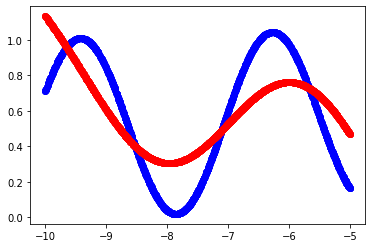

hidden:
kernel= [[0.69381243 0.5567947  0.6077904  1.2081108  1.1437917  1.1321216
  0.5948724  1.1326112  1.0176163  0.9154685 ]]
bias =  [ 5.2376056  7.990409   9.232195   5.8472214  8.112733  10.080726
  9.226977  10.085098   7.2557106  8.348613 ]
output:
kernel= [[ 0.28547463]
 [ 0.6027451 ]
 [ 0.5377524 ]
 [-2.6636715 ]
 [ 1.9471352 ]
 [-1.2164104 ]
 [ 0.59648293]
 [-1.1324813 ]
 [ 1.2021241 ]
 [-1.0402924 ]]
bias =  [0.16953914]


In [ ]:
x0, x1 = -10, -5 # діапазон аргументу функції
test_data_size = 2000 # кількість даних для ітераціі навчання
iterations = 20000 # кількість ітерацій навчання
learn_rate = 0.015 # коефіціент перенавчання

hiddenSize = 10 # кількість нейронів прихованого шару
# функція генерації тестових величин
def generate_test_values():
  train_x = []
  train_y = []
  for _ in range(test_data_size):
    x = x0+(x1-x0)*np.random.rand()
    y = math.exp(0.5*x) + math.pow(math.cos(x), 2)  # досліджувана функція
    train_x.append([x])
    train_y.append([y])
  return np.array(train_x), np.array(train_y)

# вузол, на який подаються аргументи функції
x = tf.compat.v1.placeholder(tf.float32, [None, 1], name="x")
# вузол, на який подаються значення функції
y = tf.compat.v1.placeholder(tf.float32, [None, 1], name="y")
# прихований шар
nn = tf.compat.v1.layers.dense(x, hiddenSize,
activation=tf.nn.sigmoid,kernel_initializer=tf.initializers.ones(), bias_initializer=tf.initializers.random_uniform(minval=-x1, maxval=-x0), name="hidden", reuse=True)
# вихідний шар
model = tf.compat.v1.layers.dense(nn, 1, activation=None, name="output", reuse=True)

# функція підрахунку помилки
cost = tf.compat.v1.losses.mean_squared_error(y, model)
train = tf.compat.v1.train.GradientDescentOptimizer(learn_rate).minimize(cost)

init = tf.compat.v1.global_variables_initializer()
with tf.compat.v1.Session() as session:
  session.run(init)
  for _ in range(iterations):
    train_dataset, train_values = generate_test_values()
    session.run(train, feed_dict={
      x: train_dataset,
      y: train_values
    })
    if(_ % 1000 == 999):
      print("cost = {}".format(session.run(cost, feed_dict={
          x: train_dataset,
          y: train_values
      })))
  train_dataset, train_values = generate_test_values()
  train_values1 = session.run(model, feed_dict={
      x: train_dataset,
      })
  plt.plot(train_dataset, train_values, "bo", train_dataset, train_values1, "ro")
  plt.show()
  with tf.compat.v1.variable_scope("hidden", reuse=True):
    w = tf.compat.v1.get_variable("kernel")
    b = tf.compat.v1.get_variable("bias")
    print("hidden:")
    print("kernel=", w.eval())
    print("bias = ", b.eval())
  with tf.compat.v1.variable_scope("output", reuse=True):
    w = tf.compat.v1.get_variable("kernel")
    b = tf.compat.v1.get_variable("bias")
    print("output:")
    print("kernel=", w.eval())
    print("bias = ", b.eval())